In [1]:
import paddle
import matplotlib.pyplot as plt
import sys
from neuralop.models import TFNO
from neuralop import Trainer
from neuralop.datasets import load_darcy_flow_small
from neuralop.utils import count_params
from neuralop import LpLoss, H1Loss

model = TFNO(n_modes=(16, 16), hidden_channels=32, projection_channels=64)

model.load_dict(paddle.load('model_trained.pdparams'))


In [2]:
from neuralop.datasets.darcy import load_darcy_flow_small
train_loader, test_loaders, output_encoder = load_darcy_flow_small(
    n_train=100, batch_size=4,
    test_resolutions=[16, 32], n_tests=[50, 50], test_batch_sizes=[4, 2],
)

UnitGaussianNormalizer init on 100, reducing over [0, 1, 2, 3], samples of shape [1, 16, 16].
   Mean and std of shape [1, 1, 1], eps=1e-05
Loading test db at resolution 32 with 50 samples and batch-size=2


C:\Users\kinet\AppData\Local\Temp\ipykernel_53752\2728742583.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


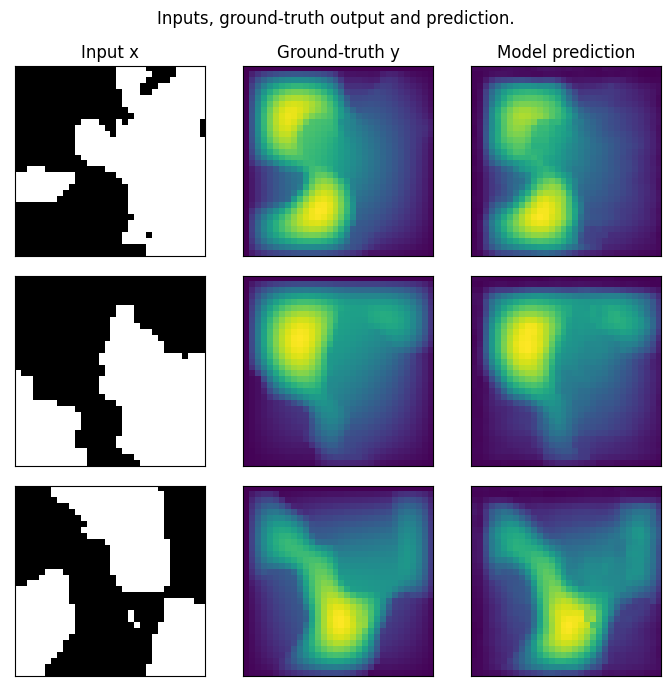

In [3]:

test_samples = test_loaders[32].dataset

fig = plt.figure(figsize=(7, 7))
for index in range(3):
    data = test_samples[index]
    # Input x
    x = data['x']
    # Ground-truth
    y = data['y']
    # Model prediction
    out = model(x.unsqueeze(0).cuda()).cpu()

    ax = fig.add_subplot(3, 3, index*3 + 1)
    ax.imshow(x[0], cmap='gray')
    if index == 0:
        ax.set_title('Input x')
    plt.xticks([], [])
    plt.yticks([], [])

    ax = fig.add_subplot(3, 3, index*3 + 2)
    ax.imshow(y.squeeze())
    if index == 0:
        ax.set_title('Ground-truth y')
    plt.xticks([], [])
    plt.yticks([], [])

    ax = fig.add_subplot(3, 3, index*3 + 3)
    ax.imshow(out.squeeze().detach().numpy())
    if index == 0:
        ax.set_title('Model prediction')
    plt.xticks([], [])
    plt.yticks([], [])

fig.suptitle('Inputs, ground-truth output and prediction.', y=0.98)
plt.tight_layout()
fig.show()
